In [33]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [34]:
iris = load_iris()
X, y = iris.data, iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [35]:
scaler = Standard:Scaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [36]:
def evaluate_knn(k_values):
  return [
    (
      k,
      accuracy_score(y_train, KNeighborsClassifier(n_neighbors=k).fit(X_train, y_train).predict(X_train)),
      accuracy_score(y_test, KNeighborsClassifier(n_neighbors=k).fit(X_train, y_train).predict(X_test)),
      abs(
        accuracy_score(y_train, KNeighborsClassifier(n_neighbors=k).fit(X_train, y_train).predict(X_train)) -
        accuracy_score(y_test, KNeighborsClassifier(n_neighbors=k).fit(X_train, y_train).predict(X_test))
      )
    )
    for k in k_values
  ]

In [37]:
results = evaluate_knn(range(1, 21))
for k, train_acc, test_acc, diff in results:
  print(f"k={k}, Train Acc={train_acc:.4f}, Test Acc={test_acc:.4f}, Diff={diff:.4f}")

k=1, Train Acc=1.0000, Test Acc=1.0000, Diff=0.0000
k=2, Train Acc=0.9667, Test Acc=1.0000, Diff=0.0333
k=3, Train Acc=0.9417, Test Acc=1.0000, Diff=0.0583
k=4, Train Acc=0.9583, Test Acc=1.0000, Diff=0.0417
k=5, Train Acc=0.9583, Test Acc=1.0000, Diff=0.0417
k=6, Train Acc=0.9583, Test Acc=1.0000, Diff=0.0417
k=7, Train Acc=0.9583, Test Acc=1.0000, Diff=0.0417
k=8, Train Acc=0.9583, Test Acc=1.0000, Diff=0.0417
k=9, Train Acc=0.9500, Test Acc=1.0000, Diff=0.0500
k=10, Train Acc=0.9417, Test Acc=1.0000, Diff=0.0583
k=11, Train Acc=0.9583, Test Acc=1.0000, Diff=0.0417
k=12, Train Acc=0.9583, Test Acc=1.0000, Diff=0.0417
k=13, Train Acc=0.9583, Test Acc=1.0000, Diff=0.0417
k=14, Train Acc=0.9583, Test Acc=1.0000, Diff=0.0417
k=15, Train Acc=0.9583, Test Acc=1.0000, Diff=0.0417
k=16, Train Acc=0.9583, Test Acc=1.0000, Diff=0.0417
k=17, Train Acc=0.9500, Test Acc=1.0000, Diff=0.0500
k=18, Train Acc=0.9583, Test Acc=1.0000, Diff=0.0417
k=19, Train Acc=0.9500, Test Acc=1.0000, Diff=0.0500
k=

In [38]:
best_train = max(results, key=lambda x: x[1])
best_test = max(results, key=lambda x: x[2])
lowest_diff = min(results, key=lambda x: x[3])

print(f"\nBest k for training accuracy: {best_train}")
print(f"Best k for test accuracy: {best_test}")
print(f"Best k for lowest difference: {lowest_diff}")


Best k for training accuracy: (1, 1.0, 1.0, 0.0)
Best k for test accuracy: (1, 1.0, 1.0, 0.0)
Best k for lowest difference: (1, 1.0, 1.0, 0.0)


In [39]:
optimal_k = lowest_diff[0]
knn = KNeighborsClassifier(n_neighbors=optimal_k)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [40]:
print(f"\nAccuracy on test data: {accuracy_score(y_test, y_pred):.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=iris.target_names))


Accuracy on test data: 1.00

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [41]:
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)


Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

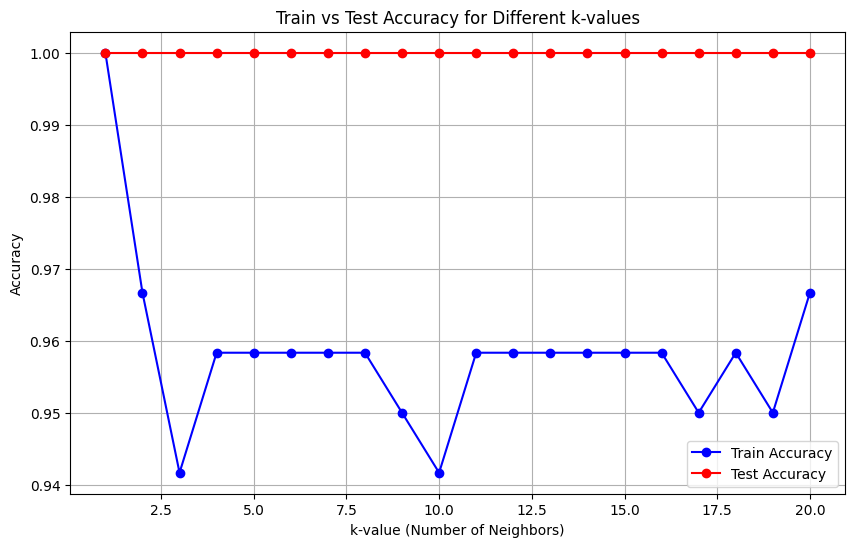

In [43]:
# Plot Accuracy vs. k-value for Train and Test data
k_values = range(1, 21)
train_accuracies = [train_acc for _, train_acc, _, _ in results]
test_accuracies = [test_acc for _, _, test_acc, _ in results]

plt.figure(figsize=(10, 6))
plt.plot(k_values, train_accuracies, label='Train Accuracy', marker='o', linestyle='-', color='b')
plt.plot(k_values, test_accuracies, label='Test Accuracy', marker='o', linestyle='-', color='r')
plt.title('Train vs Test Accuracy for Different k-values')
plt.xlabel('k-value (Number of Neighbors)')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

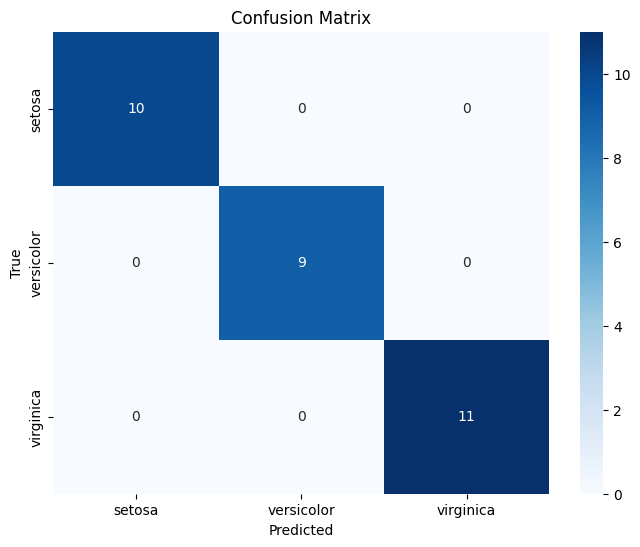

In [44]:
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [45]:
import seaborn as sns
import pandas as pd

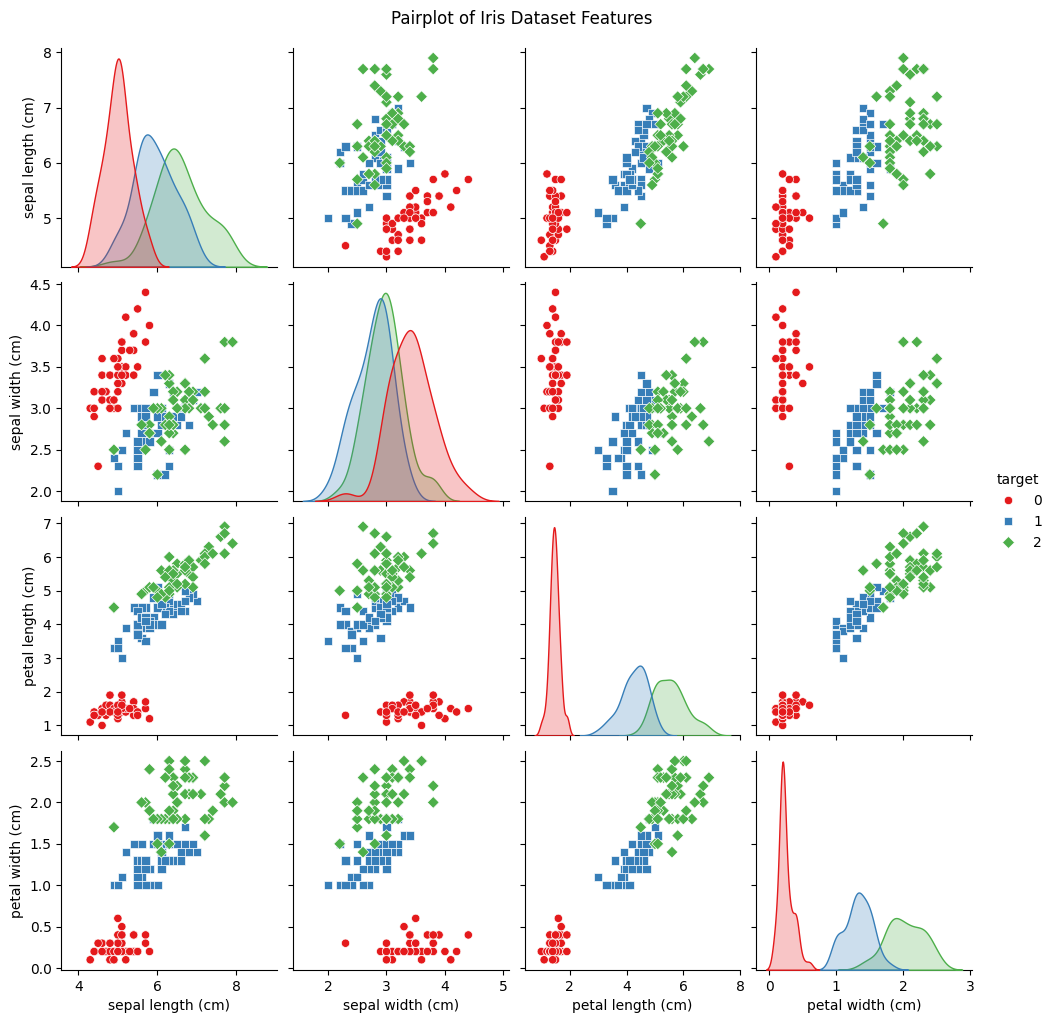

In [46]:
# Load the data into a DataFrame
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['target'] = iris.target

# Pairplot to visualize the relationships between features
sns.pairplot(iris_df, hue='target', palette='Set1', markers=['o', 's', 'D'])
plt.suptitle("Pairplot of Iris Dataset Features", y=1.02)
plt.show()

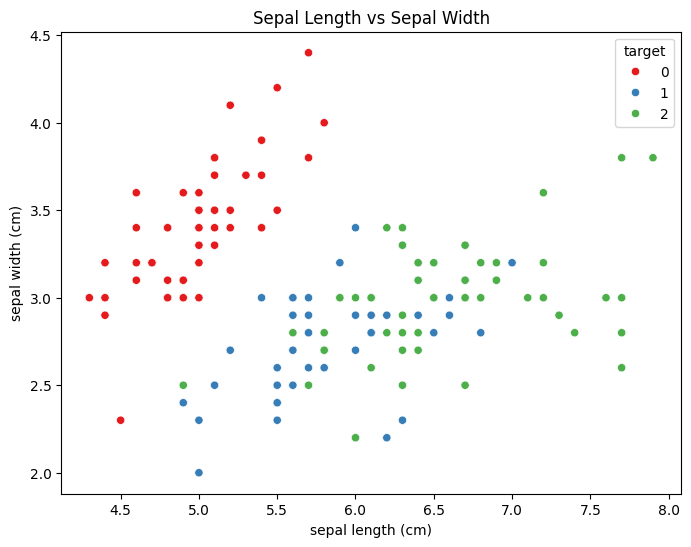

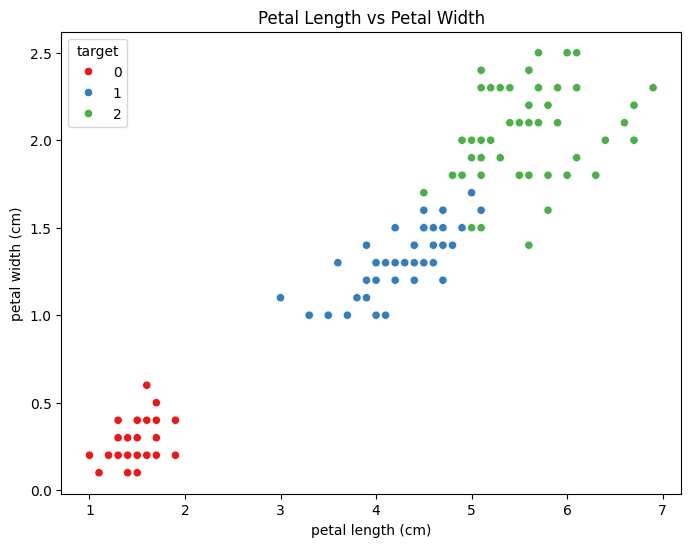

In [47]:
# Visualizing 2D scatter plots for pairs of features
# Sepal Length vs Sepal Width
plt.figure(figsize=(8, 6))
sns.scatterplot(data=iris_df, x=iris.feature_names[0], y=iris.feature_names[1], hue='target', palette='Set1')
plt.title('Sepal Length vs Sepal Width')
plt.show()

# Petal Length vs Petal Width
plt.figure(figsize=(8, 6))
sns.scatterplot(data=iris_df, x=iris.feature_names[2], y=iris.feature_names[3], hue='target', palette='Set1')
plt.title('Petal Length vs Petal Width')
plt.show()